In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv("netflix_titles.csv")

print(df.head())
print(df.info())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [25]:
print(df.columns)
print(df.shape)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
(8807, 12)


In [26]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [27]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [28]:
print(df['release_year'].describe())

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


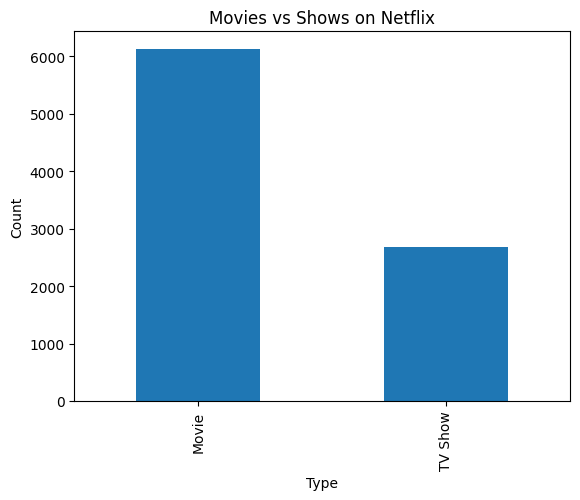

In [29]:
df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [30]:
df = df.drop(columns=['director','cast', 'description'])
print(df)

     show_id     type                  title        country  \
0         s1    Movie   Dick Johnson Is Dead  United States   
1         s2  TV Show          Blood & Water   South Africa   
2         s3  TV Show              Ganglands            NaN   
3         s4  TV Show  Jailbirds New Orleans            NaN   
4         s5  TV Show           Kota Factory          India   
...      ...      ...                    ...            ...   
8802   s8803    Movie                 Zodiac  United States   
8803   s8804  TV Show            Zombie Dumb            NaN   
8804   s8805    Movie             Zombieland  United States   
8805   s8806    Movie                   Zoom  United States   
8806   s8807    Movie                 Zubaan          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3  

In [31]:
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

print(df.isnull().sum())

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
dtype: int64


In [32]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [33]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [35]:
df['duration_value'] = df['duration'].str.extract('(\\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([A-Za-z]+)')

In [36]:
print(df[['type', 'duration', 'duration_value', 'duration_unit']])

         type   duration  duration_value duration_unit
0       Movie     90 min            90.0           min
1     TV Show  2 Seasons             2.0       Seasons
2     TV Show   1 Season             1.0        Season
3     TV Show   1 Season             1.0        Season
4     TV Show  2 Seasons             2.0       Seasons
...       ...        ...             ...           ...
8802    Movie    158 min           158.0           min
8803  TV Show  2 Seasons             2.0       Seasons
8804    Movie     88 min            88.0           min
8805    Movie     88 min            88.0           min
8806    Movie    111 min           111.0           min

[8807 rows x 4 columns]


In [37]:
countries = df['country'].str.split(', ')
countries_exploded = countries.explode()

In [38]:
top_countries = countries_exploded.value_counts().head(10)
print(top_countries)

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


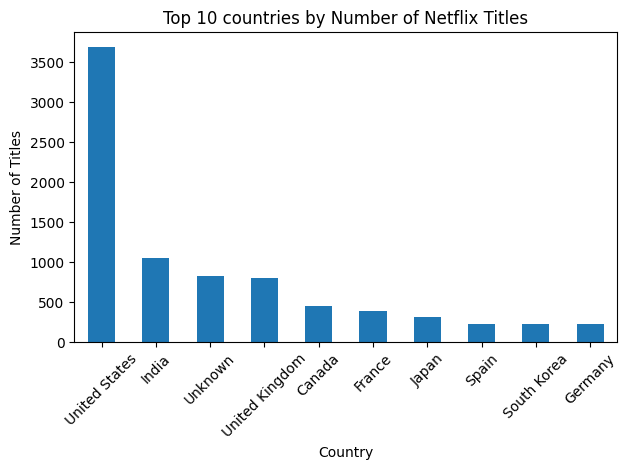

In [39]:
top_countries.plot(kind='bar')
plt.title('Top 10 countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

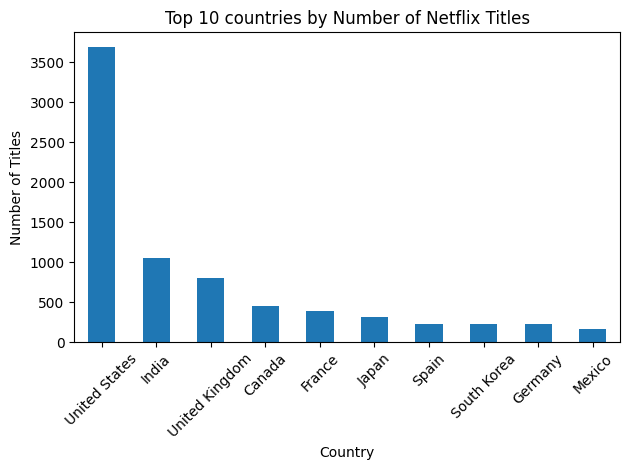

In [40]:
top_countries = countries_exploded[countries_exploded != 'Unknown'].value_counts().head(10)


top_countries.plot(kind='bar')
plt.title('Top 10 countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Netflix content is heavily dominated by the US, followed by India and the UK.